# Linear Regression Review

So the purpose of Lienar Regression is to predict a value value (y) or dependent variable, given another (x) or the independent variable.

Multiple Linear Regression follows the same pattern but simply extends to multiple independent variables.

* The dependent variable must be continuous and not discreet
* Dependent variables can be conitnuous or categorical

The predicted value of the dependent variable in a linear regression model is represented by the function:

yhat = theta_0 + theta_1 * x_1

in this function y_hat (hat for predicted) is equal to theta_0 (the intercept of the line with the y axis) + theta_1 (the slope coefficient of the line) multiplied by x.



Linear regression then estimate the coefficients (thetas) of the line that best fits the data or 'the line of best fit'

The actual value of y and y_hat are more often than not, not the same.

The difference between y and y_hat is the distance from the observation to the fitting line. It is referred to as the residual error.

The mean average of the residual errors shows how well the trend line fits the dataset.

It is represented by the function MSE or 'mean squared error' where:

MSE= 
n
1
​
 ∑ 
i=1
n
​
 (y 
i
​
 − 
y
^
​
  
i
​
 ) 
2

#  The objective of linear regression is to minimise the MSE equation

There are two approaches to this, a mathematical approach and a optimization approach

### Regression Evaluation

There are two main ways to evaluate a linear regression model:

1) Train and Test

2) Train/Test Splits

Training and testing both trains on the whole dataset and then tests on a portion of the dataset with the labels (actual values) removed, whereas as the name implies, train test splits trains on a portion of the data and then tests on another.

The simplest metric for evaluation is the average of the errors or the difference between the actual values (labels) and predicted values.

Accuracy can be sub-divided into two types:

* Training Accuracy
* Out-of-sample Accuracy

As the name implies, training accuracy is the accuracy of the model on the trainign data whereas out-of-sample accuracy is the accuracy on data not in the model.

The issue with not using a split is this will normally produce a high training accuracy but low oos accuracy, as the model becomes 'over-fitted', meaning it is too highly attuned to the dataset and cannot be generalized.

By using a train test split, this issue can be to some extent mitigated.

The issue with this is that the outcomes are highly dependent on the datasets the model is trained on.


Another approach to evaluation that resolves most of these issues is K-Fold cross validation

### K-Fold Cross-Validation

In K-Fold cross validation, the dataset is split into x folds. The data in the fold is used for testing and the rest for training. This is repeated x times and the average accuracy calculated.

### Evaluation Metrics

In Regression there are several evaluation metrics. Most commonly used are:

* Mean Absolute Error
* Mean Square Error
* Root Mean Squared Error
* R - Squared

#### Mean absolute Error is the mean of the total sum of errors
#### Mean squared error is more popular that MAE as it highlights larger outliers
#### Root mean is the squareroot of the mse and is very popular as it can be interpreted in the same units as the response vector
#### RAE Relative Absolute Error or residual sum of squares takes the total absolute error (y - y_hat) and divides by the total absolute error of the simple predictor (y - y_mean)
#### Relative squared error is similar to RAE and is used to calculate R^2 except squared, not absolute.
#### R^2 is 1 - the RSE and shows how accurate the values are to the fitted regression line

Ok, so let's do a review. First we will import the required packages, and read the dataset. In this instance we are looking at at simple daily change (%) on the $BTC and $HBAR time series' from the start of 2022 to august 2023

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [11]:
df = pd.read_csv("../Datasets/BTC-USD_HBAR-USD_Jan22-Aug23.csv")

In [12]:
df.head(5)

,Date,Close,Volume,HBAR_Close,BTC_Chg,HBAR_Chg
0,04/01/2022,45897.57422,4.249468e+10,0.325898,-0.012066,0.063289
1,05/01/2022,43569.00391,3.685108e+10,0.288261,-0.050734,-0.115487
2,06/01/2022,43160.92969,3.020805e+10,0.294404,-0.009366,0.021311
3,07/01/2022,41557.90234,8.419661e+10,0.272412,-0.037141,-0.074700
4,08/01/2022,41733.94141,2.806636e+10,0.265500,0.004236,-0.025373


Text(0, 0.5, 'HBAR')

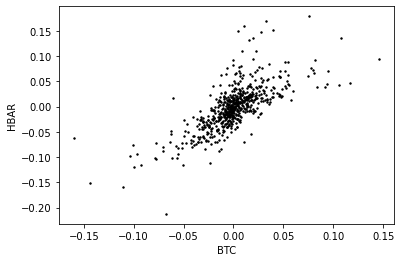

In [16]:
plt.scatter(df["BTC_Chg"],df["HBAR_Chg"], color="black", s=2)
plt.xlabel("BTC")
plt.ylabel("HBAR")

We are looking to see changes in BTC price share correlation with changes in HBAR price. From the graph, we have BTC on the x axis and HBAR as our dependent value on the y axis. There appears to be a correlation.

so lets divide the data into a trainign a test set

In [17]:
msk = np.random.rand(len(df)) < 0.8
train_set = df[msk]
test_set = df[~msk]

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_set[["BTC_Chg"]])
train_y = np.asanyarray(train_set[["HBAR_Chg"]])
regr.fit(train_x, train_y)

print(f"Coefficients: {regr.coef_}")
print(f"Intercept: {regr.intercept_}")

Coefficients: [[1.09838262]]
Intercept: [-0.00108427]


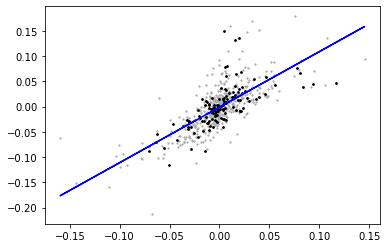

In [79]:
plt.scatter(train_set["BTC_Chg"], train_set["HBAR_Chg"], color='#aaa', s=1.5)
plt.scatter(test_set["BTC_Chg"], test_set["HBAR_Chg"], color="black", s=3)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'blue')

In [22]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_set[['BTC_Chg']])
test_y = np.asanyarray(test_set[['HBAR_Chg']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.43


In [23]:
from scipy.stats import pearsonr

In [24]:
corr_coef, p_val = pearsonr(df["BTC_Chg"], df["HBAR_Chg"])

In [59]:
print(f"correlation between BTC and HBAR is: {corr_coef}")
print(f"significance of this result is {p_val}")

correlation between BTC and HBAR is: 0.7251016307371697
significance of this result is 1.1786707042697515e-97


### Using K-Fold Cross-Validation

So, the IBM course doesn't go into this but it might be an idea to look at what they recommend as a superior evaluation technique; K-Folds Cross-Validation.

First import the modules from sklearn

In [51]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
x_data = np.asanyarray(df[['BTC_Chg']])
y_data = np.asanyarray(df[['HBAR_Chg']])

In [53]:
k = 7
kf = KFold(n_splits=k, shuffle=True, random_state=69)

In [54]:
model = LinearRegression()
mse_scores = []
r2_scores = []

In [55]:
for training_index, val_index in kf.split(x_data):
    x_train, x_val = x_data[training_index], x_data[val_index]
    y_train, y_val = y_data[training_index], y_data[val_index]
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)
    
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

In [56]:
av_mse = np.mean(mse_scores)
print(f"Av MSE: {av_mse}")

av_r2 = np.mean(r2_scores)
print(f"Av R-Squared: {av_r2}")

Av MSE: 0.0009500311934898282
Av R-Squared: 0.5228258766177892


In [57]:
for score in r2_scores:
    print(score)

0.522353010361809
0.5600749526460111
0.385543975432296
0.5394111593515314
0.5304385109559888
0.6005413158854482
0.5214182116914401


### Sigmoid Regression

Just because I feel like the data fits it, lets try a sigmoid function

In [100]:
from scipy.optimize import curve_fit

In [101]:
def sigmoid(x,L,k,x0):
    return L / (1 + np.exp(-k*(x -x0)))

In [102]:
x_data = np.asanyarray(df['BTC_Chg'])
y_data = np.asanyarray(df['HBAR_Chg'])

print(x_data.shape)

(592,)


In [173]:
popt, _ = curve_fit(sigmoid, x_data, y_data, p0=[3,0.5,5])

In [174]:
L_opt, k_opt, x0_opt = popt

# Calculate the predicted values using the fitted sigmoid function
y_pred = sigmoid(x_data, L_opt, k_opt, x0_opt)

# Calculate the R-squared value
r2 = r2_score(y_data, y_pred)

print("R-squared:", r2)

R-squared: 0.19649368676288403


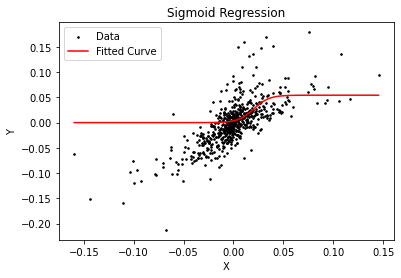

In [175]:
x_smooth = np.linspace(min(x_data), max(x_data), 100)
y_smooth = sigmoid(x_smooth, L_opt, k_opt, x0_opt)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data', color="black", s=2.5)
plt.plot(x_smooth, y_smooth, label='Fitted Curve', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sigmoid Regression')
plt.legend()
plt.show()